<a href="https://colab.research.google.com/github/MpRonald/Deep-Learning/blob/main/Gera%C3%A7%C3%A3o_de_novas_imagens_com_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geração de novas imagens com GANs

## Etapa 1: Importação das bibliotecas

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'1.12.0+cu113'

In [2]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [3]:
transform = transforms.ToTensor()
train = datasets.MNIST(root = '.', train = True, download = True, 
                       transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## Etapa 3: Construção do gerador

In [4]:
class gerador(nn.Module):
  def __init__(self):
    super().__init__()

    # 100 -> 32 -> 64 -> 128 -> 784
    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

## Etapa 4: Construção do discriminador

In [5]:
class discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    # 784 -> 128 -> 64 -> 32 -> 1
    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28 * 28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

## Etapa 5: Criação dos objetos

In [6]:
G = gerador()
D = discriminador()

In [7]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [8]:
criterion = nn.BCEWithLogitsLoss()

In [9]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [10]:
G.to(device)

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [11]:
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

ÉPOCA 001 finalizada: custo discriminador 0.731506 - custo gerador 3.821939      


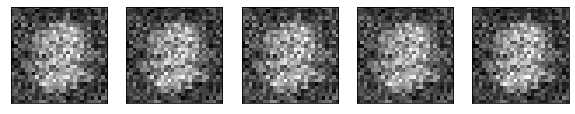

ÉPOCA 002 finalizada: custo discriminador 0.826945 - custo gerador 5.472089      


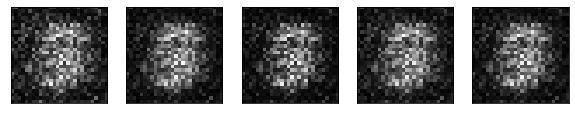

ÉPOCA 003 finalizada: custo discriminador 0.963072 - custo gerador 3.892181      


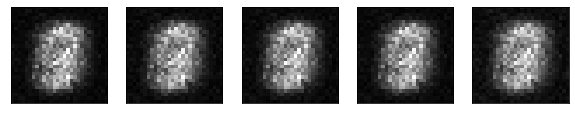

ÉPOCA 004 finalizada: custo discriminador 1.087600 - custo gerador 2.537340      


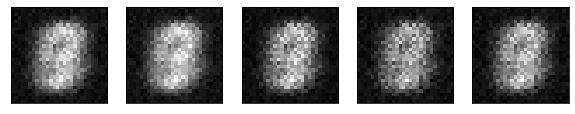

ÉPOCA 005 finalizada: custo discriminador 1.186981 - custo gerador 1.512159      


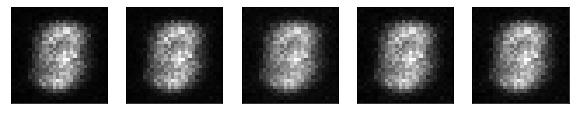

ÉPOCA 006 finalizada: custo discriminador 1.199371 - custo gerador 1.381011      


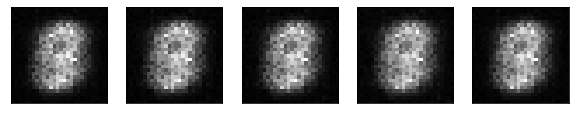

ÉPOCA 007 finalizada: custo discriminador 1.076360 - custo gerador 2.344591      


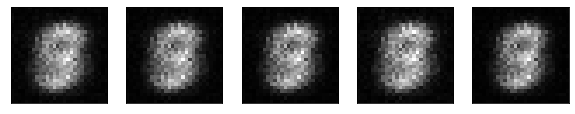

ÉPOCA 008 finalizada: custo discriminador 1.113953 - custo gerador 1.319183      


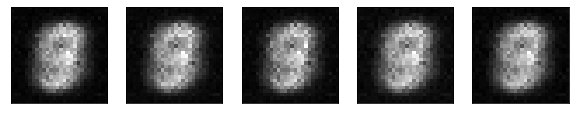

ÉPOCA 009 finalizada: custo discriminador 0.995846 - custo gerador 1.815767      


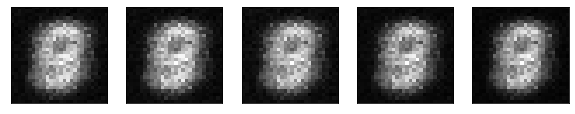

ÉPOCA 010 finalizada: custo discriminador 1.007563 - custo gerador 1.755954      


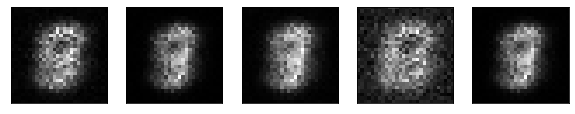

ÉPOCA 011 finalizada: custo discriminador 0.977952 - custo gerador 1.950375      


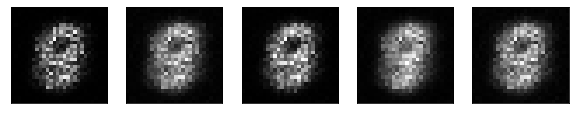

ÉPOCA 012 finalizada: custo discriminador 0.899278 - custo gerador 2.071351      


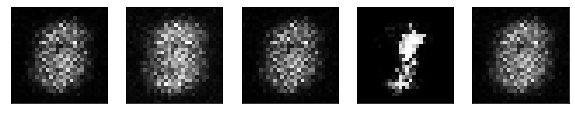

ÉPOCA 013 finalizada: custo discriminador 0.884448 - custo gerador 2.189391      


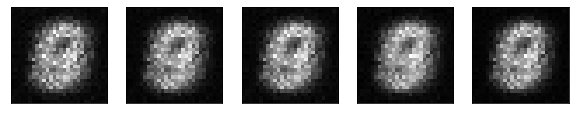

ÉPOCA 014 finalizada: custo discriminador 0.972891 - custo gerador 2.142880      


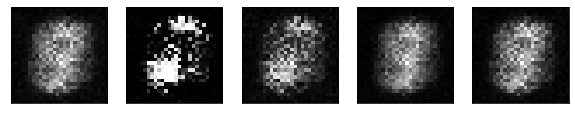

ÉPOCA 015 finalizada: custo discriminador 1.004936 - custo gerador 1.822171      


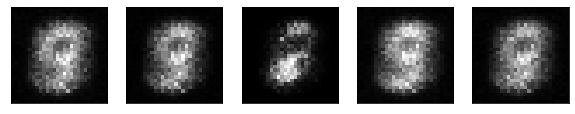

ÉPOCA 016 finalizada: custo discriminador 1.087604 - custo gerador 1.550593      


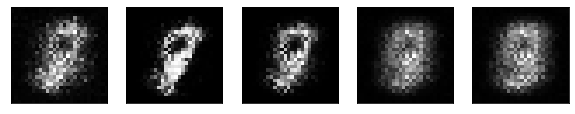

ÉPOCA 017 finalizada: custo discriminador 1.118292 - custo gerador 1.587215      


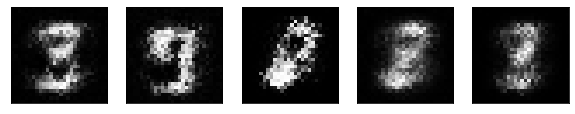

ÉPOCA 018 finalizada: custo discriminador 1.134559 - custo gerador 1.569488      


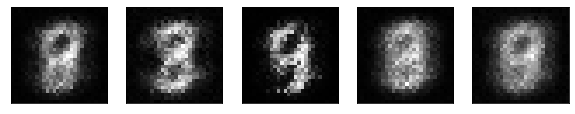

ÉPOCA 019 finalizada: custo discriminador 1.119660 - custo gerador 1.434064      


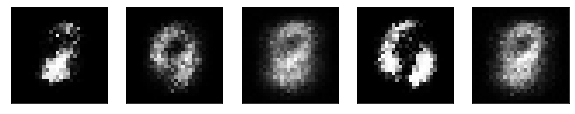

ÉPOCA 020 finalizada: custo discriminador 1.125755 - custo gerador 1.478632      


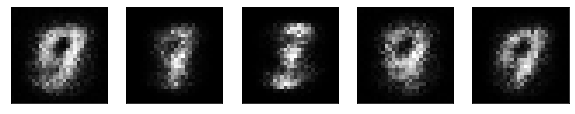

ÉPOCA 021 finalizada: custo discriminador 1.139042 - custo gerador 1.588736      


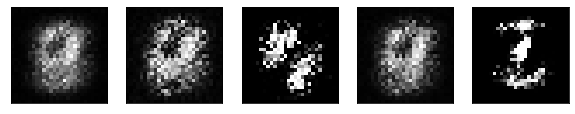

ÉPOCA 022 finalizada: custo discriminador 1.096205 - custo gerador 1.506332      


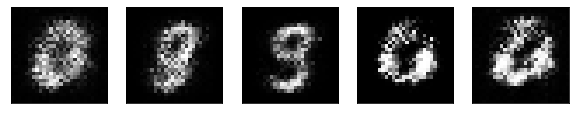

ÉPOCA 023 finalizada: custo discriminador 1.129156 - custo gerador 1.598840      


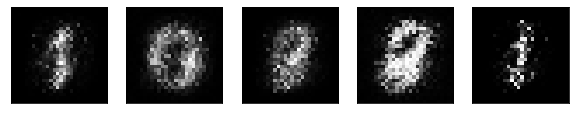

ÉPOCA 024 finalizada: custo discriminador 1.079155 - custo gerador 1.624930      


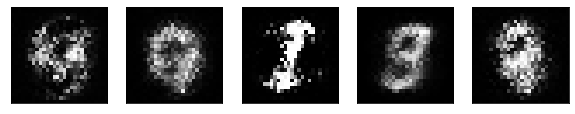

ÉPOCA 025 finalizada: custo discriminador 1.104565 - custo gerador 1.669377      


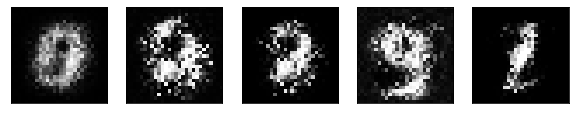

ÉPOCA 026 finalizada: custo discriminador 1.158664 - custo gerador 1.519328      


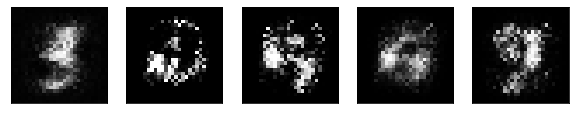

ÉPOCA 027 finalizada: custo discriminador 1.169518 - custo gerador 1.466710      


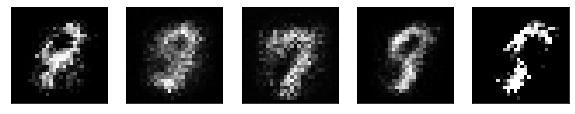

ÉPOCA 028 finalizada: custo discriminador 1.153756 - custo gerador 1.379833      


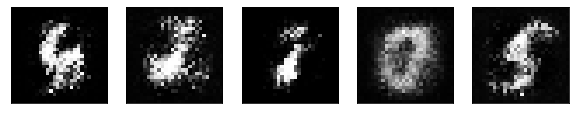

ÉPOCA 029 finalizada: custo discriminador 1.120830 - custo gerador 1.593659      


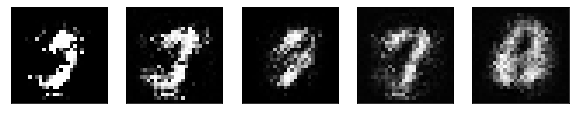

ÉPOCA 030 finalizada: custo discriminador 1.120575 - custo gerador 1.609049      


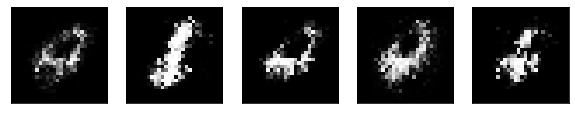

ÉPOCA 031 finalizada: custo discriminador 1.143048 - custo gerador 1.467866      


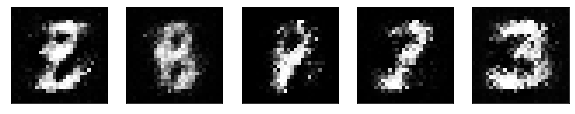

ÉPOCA 032 finalizada: custo discriminador 1.138817 - custo gerador 1.484116      


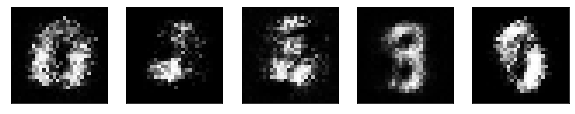

ÉPOCA 033 finalizada: custo discriminador 1.124430 - custo gerador 1.531690      


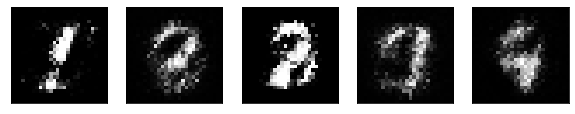

ÉPOCA 034 finalizada: custo discriminador 1.151391 - custo gerador 1.451300      


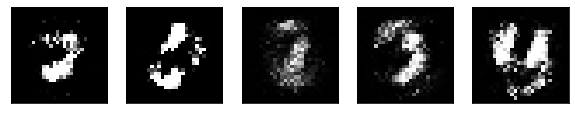

ÉPOCA 035 finalizada: custo discriminador 1.132819 - custo gerador 1.474988      


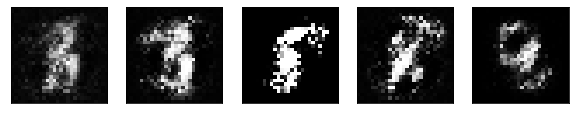

ÉPOCA 036 finalizada: custo discriminador 1.166974 - custo gerador 1.376767      


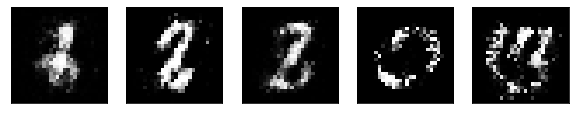

ÉPOCA 037 finalizada: custo discriminador 1.147853 - custo gerador 1.428076      


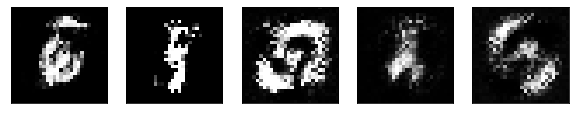

ÉPOCA 038 finalizada: custo discriminador 1.187951 - custo gerador 1.350067      


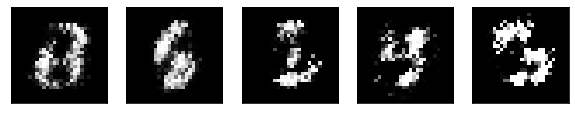

ÉPOCA 039 finalizada: custo discriminador 1.199039 - custo gerador 1.322796      


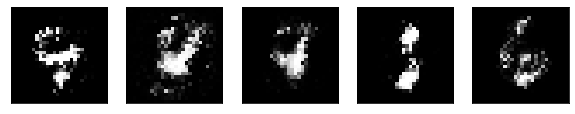

ÉPOCA 040 finalizada: custo discriminador 1.176452 - custo gerador 1.360974      


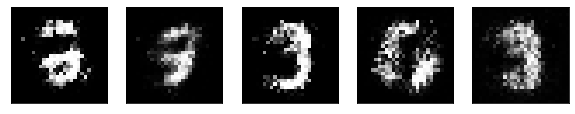

ÉPOCA 041 finalizada: custo discriminador 1.192248 - custo gerador 1.317704      


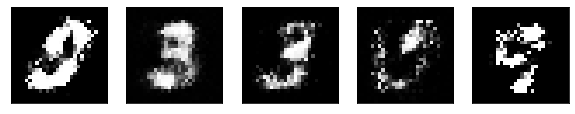

ÉPOCA 042 finalizada: custo discriminador 1.177063 - custo gerador 1.344356      


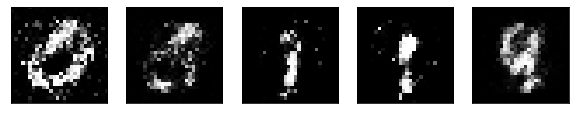

ÉPOCA 043 finalizada: custo discriminador 1.175806 - custo gerador 1.377772      


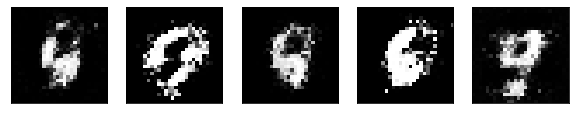

ÉPOCA 044 finalizada: custo discriminador 1.175314 - custo gerador 1.348310      


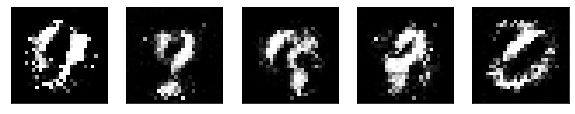

ÉPOCA 045 finalizada: custo discriminador 1.185654 - custo gerador 1.315168      


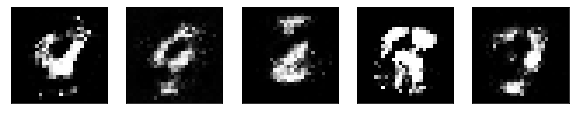

ÉPOCA 046 finalizada: custo discriminador 1.215912 - custo gerador 1.250065      


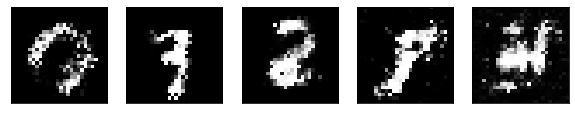

ÉPOCA 047 finalizada: custo discriminador 1.205858 - custo gerador 1.267792      


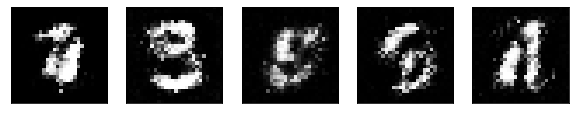

ÉPOCA 048 finalizada: custo discriminador 1.194717 - custo gerador 1.251011      


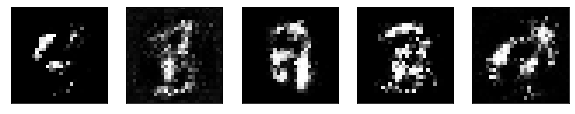

ÉPOCA 049 finalizada: custo discriminador 1.226995 - custo gerador 1.174843      


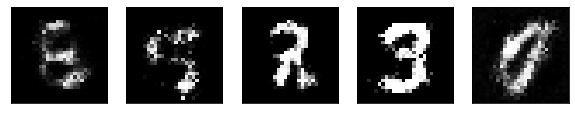

ÉPOCA 050 finalizada: custo discriminador 1.239559 - custo gerador 1.122086      


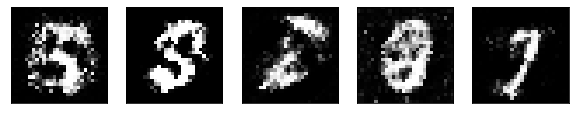

ÉPOCA 051 finalizada: custo discriminador 1.239764 - custo gerador 1.145358      


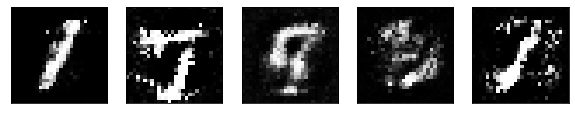

ÉPOCA 052 finalizada: custo discriminador 1.245282 - custo gerador 1.131112      


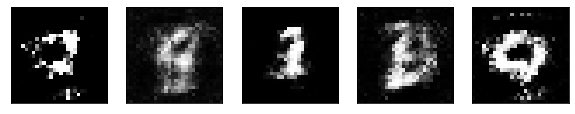

ÉPOCA 053 finalizada: custo discriminador 1.256891 - custo gerador 1.102826      


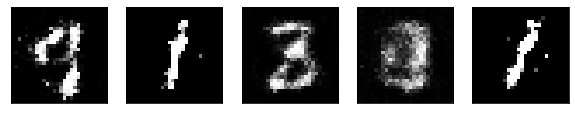

ÉPOCA 054 finalizada: custo discriminador 1.246308 - custo gerador 1.122403      


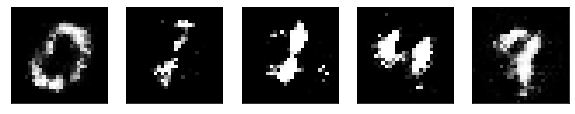

ÉPOCA 055 finalizada: custo discriminador 1.240138 - custo gerador 1.140012      


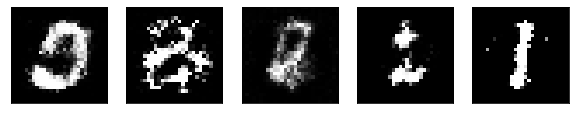

ÉPOCA 056 finalizada: custo discriminador 1.243668 - custo gerador 1.138812      


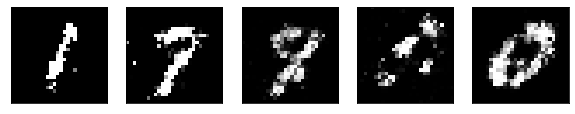

ÉPOCA 057 finalizada: custo discriminador 1.252774 - custo gerador 1.115764      


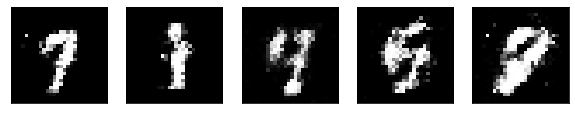

ÉPOCA 058 finalizada: custo discriminador 1.256418 - custo gerador 1.119857      


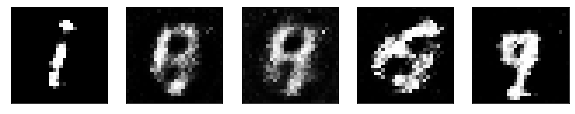

ÉPOCA 059 finalizada: custo discriminador 1.262627 - custo gerador 1.140574      


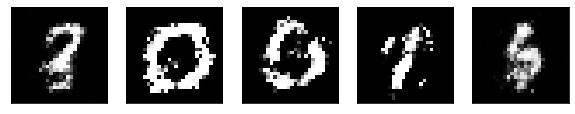

ÉPOCA 060 finalizada: custo discriminador 1.250640 - custo gerador 1.138825      


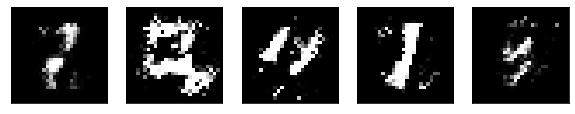

ÉPOCA 061 finalizada: custo discriminador 1.245703 - custo gerador 1.192745      


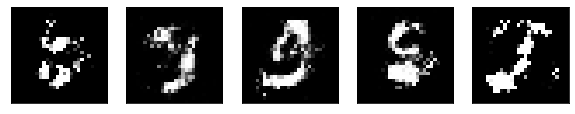

ÉPOCA 062 finalizada: custo discriminador 1.221753 - custo gerador 1.220551      


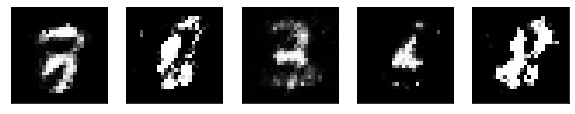

ÉPOCA 063 finalizada: custo discriminador 1.222654 - custo gerador 1.191793      


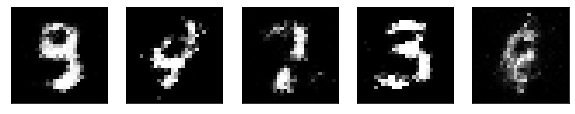

ÉPOCA 064 finalizada: custo discriminador 1.226283 - custo gerador 1.165120      


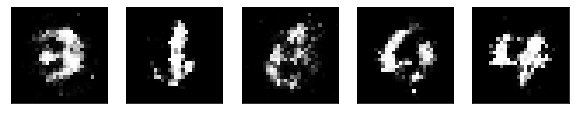

ÉPOCA 065 finalizada: custo discriminador 1.235523 - custo gerador 1.182646      


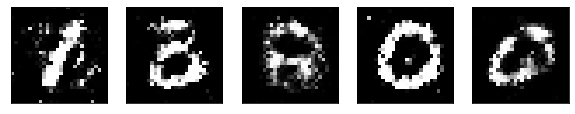

ÉPOCA 066 finalizada: custo discriminador 1.223766 - custo gerador 1.220813      


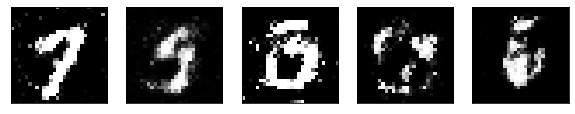

ÉPOCA 067 finalizada: custo discriminador 1.231572 - custo gerador 1.186176      


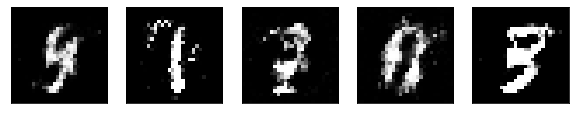

ÉPOCA 068 finalizada: custo discriminador 1.248831 - custo gerador 1.181531      


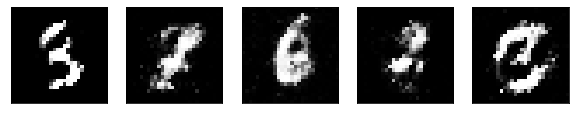

ÉPOCA 069 finalizada: custo discriminador 1.235297 - custo gerador 1.174723      


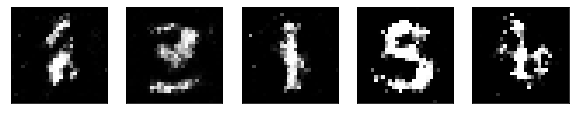

ÉPOCA 070 finalizada: custo discriminador 1.238818 - custo gerador 1.149510      


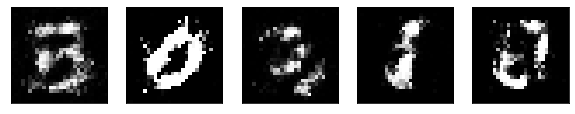

ÉPOCA 071 finalizada: custo discriminador 1.249274 - custo gerador 1.145404      


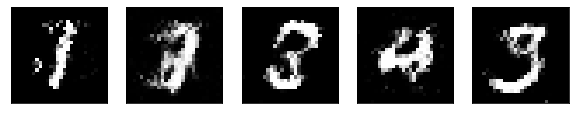

ÉPOCA 072 finalizada: custo discriminador 1.233230 - custo gerador 1.231939      


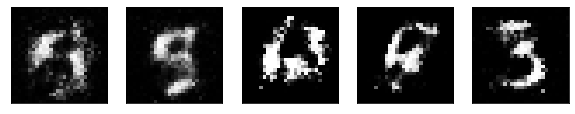

ÉPOCA 073 finalizada: custo discriminador 1.248931 - custo gerador 1.143690      


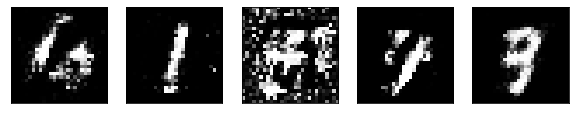

ÉPOCA 074 finalizada: custo discriminador 1.239342 - custo gerador 1.184187      


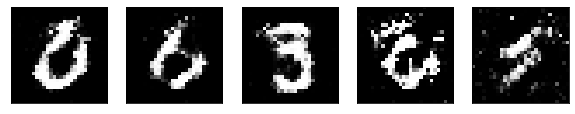

ÉPOCA 075 finalizada: custo discriminador 1.257917 - custo gerador 1.138818      


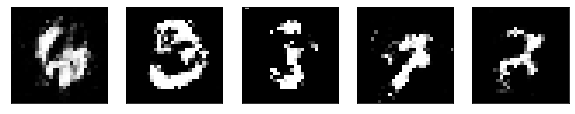

ÉPOCA 076 finalizada: custo discriminador 1.248958 - custo gerador 1.147812      


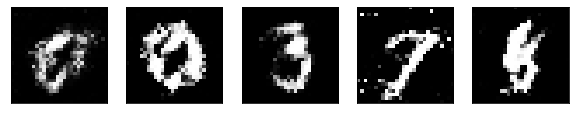

ÉPOCA 077 finalizada: custo discriminador 1.262423 - custo gerador 1.098549      


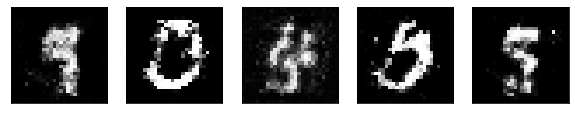

ÉPOCA 078 finalizada: custo discriminador 1.265073 - custo gerador 1.107110      


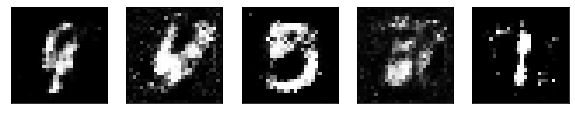

ÉPOCA 079 finalizada: custo discriminador 1.269059 - custo gerador 1.082708      


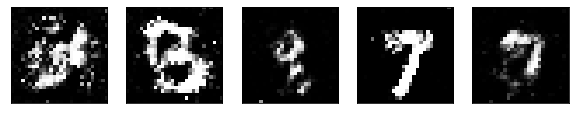

ÉPOCA 080 finalizada: custo discriminador 1.271845 - custo gerador 1.067115      


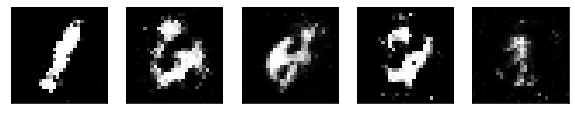

ÉPOCA 081 finalizada: custo discriminador 1.269358 - custo gerador 1.077025      


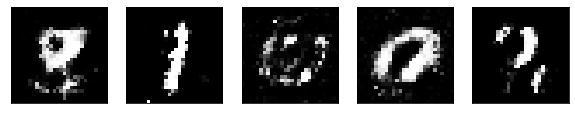

ÉPOCA 082 finalizada: custo discriminador 1.290489 - custo gerador 1.038191      


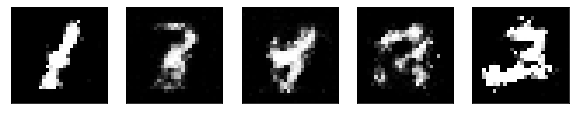

ÉPOCA 083 finalizada: custo discriminador 1.267909 - custo gerador 1.082763      


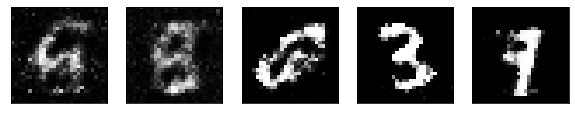

ÉPOCA 084 finalizada: custo discriminador 1.282952 - custo gerador 1.062932      


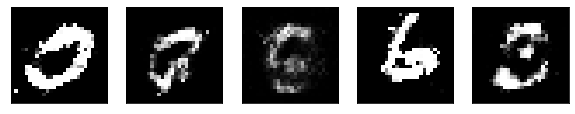

ÉPOCA 085 finalizada: custo discriminador 1.266202 - custo gerador 1.182384      


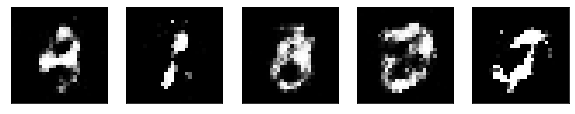

ÉPOCA 086 finalizada: custo discriminador 1.249687 - custo gerador 1.157482      


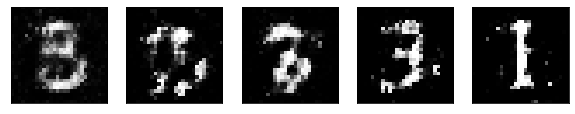

ÉPOCA 087 finalizada: custo discriminador 1.264870 - custo gerador 1.084209      


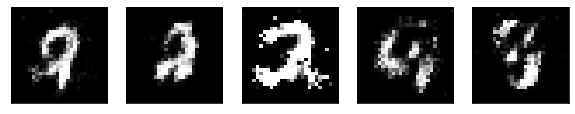

ÉPOCA 088 finalizada: custo discriminador 1.277274 - custo gerador 1.077689      


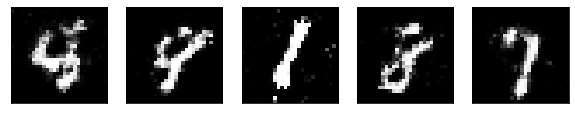

ÉPOCA 089 finalizada: custo discriminador 1.270652 - custo gerador 1.095616      


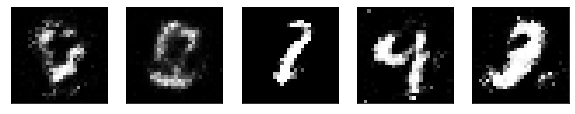

ÉPOCA 090 finalizada: custo discriminador 1.267008 - custo gerador 1.129857      


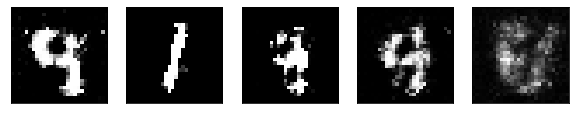

ÉPOCA 091 finalizada: custo discriminador 1.258269 - custo gerador 1.150934      


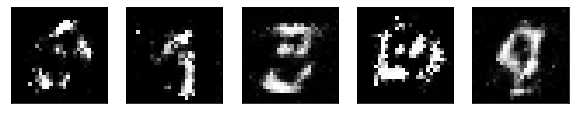

ÉPOCA 092 finalizada: custo discriminador 1.251938 - custo gerador 1.167829      


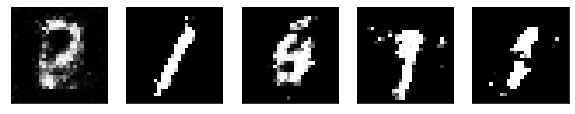

ÉPOCA 093 finalizada: custo discriminador 1.252708 - custo gerador 1.160997      


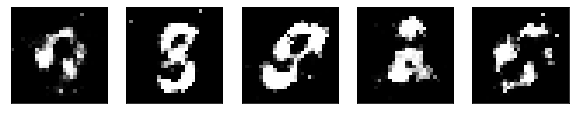

ÉPOCA 094 finalizada: custo discriminador 1.243247 - custo gerador 1.174630      


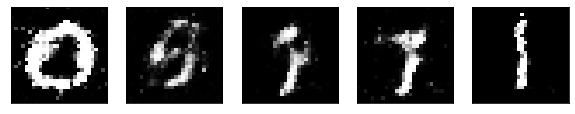

ÉPOCA 095 finalizada: custo discriminador 1.245903 - custo gerador 1.162546      


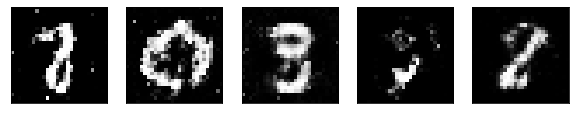

ÉPOCA 096 finalizada: custo discriminador 1.256524 - custo gerador 1.118217      


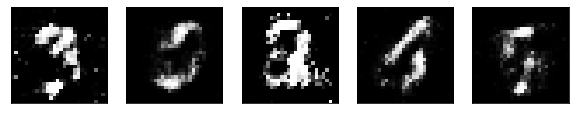

ÉPOCA 097 finalizada: custo discriminador 1.266720 - custo gerador 1.116194      


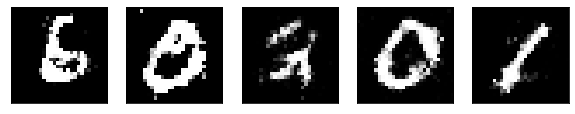

ÉPOCA 098 finalizada: custo discriminador 1.249467 - custo gerador 1.107353      


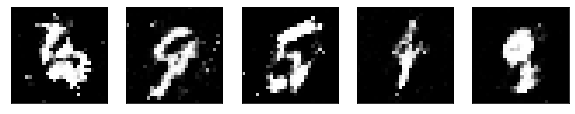

ÉPOCA 099 finalizada: custo discriminador 1.263542 - custo gerador 1.103573      


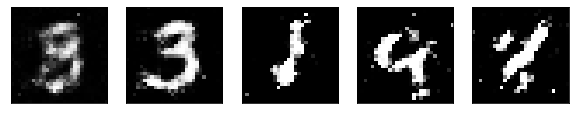

ÉPOCA 100 finalizada: custo discriminador 1.274169 - custo gerador 1.077922      


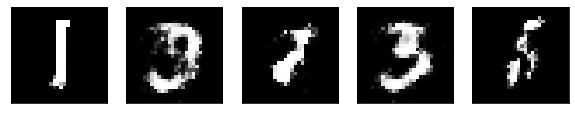

In [12]:
for epoch in range(100):
    D_running_loss = 0
    G_running_loss = 0
    
    for i, (imagens_reais, _) in enumerate(train_loader):
        batch_size = imagens_reais.size(0)
        imagens_reais = imagens_reais * 2 - 1
        imagens_reais = imagens_reais.to(device)

        # Treinamento do gerador
        G_optimizer.zero_grad()
        ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.ones(batch_size).to(device)
        G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
        G_loss.backward()
        G_optimizer.step()

        # Treinamento do discriminador
        D_optimizer.zero_grad()
        outputs_reais = D.forward(imagens_reais)
        labels_reais = (torch.ones(batch_size) * 0.9).to(device)
        D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

        ruido = np.random.uniform(-1., 1., (batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.zeros(batch_size).to(device)
        D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

        D_loss = D_loss_reais + D_loss_falsas
        D_loss.backward()
        D_optimizer.step()

        D_running_loss += D_loss.item()
        G_running_loss += G_loss.item()

        # Imprimindo os dados referentes a esse batch   
        print('\rÉpoca {:03d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch + 1, i + 1, len(train_loader), D_loss.item(), G_loss.item()), end = '\r')
  
    # Imprimindo os dados referentes a essa época
    D_running_loss /= len(train_loader)
    G_running_loss /= len(train_loader)
    print('ÉPOCA {:03d} finalizada: custo discriminador {:03.6f} - custo gerador {:03.6f}      '.format(epoch + 1, D_running_loss, G_running_loss))

    fig, ax = plt.subplots(1, 5, figsize=(10,5))
    for i in range(5):
      ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
      ax[i].xaxis.set_visible(False)
      ax[i].yaxis.set_visible(False)
    plt.show()


## Etapa 7: Criação de novas imagens

In [13]:
ruido = np.random.uniform(-1., 1., (20, 100))

In [14]:
ruido[1]

array([-0.46269951,  0.19839194, -0.62957692,  0.65345772,  0.76421067,
        0.69558416,  0.59620461, -0.73013607,  0.96241147, -0.61330331,
        0.01471066,  0.70054712, -0.50592866,  0.25309371, -0.3379805 ,
        0.13478524,  0.01805097,  0.60307027,  0.89673363,  0.60514029,
        0.0133595 , -0.97756359,  0.71634081,  0.23198188,  0.73810631,
        0.69021025,  0.12651119, -0.663897  ,  0.94548811, -0.53571172,
        0.61553457, -0.28628557,  0.9644829 ,  0.04787341, -0.67504246,
       -0.29124991, -0.5120455 ,  0.15822313,  0.9066343 , -0.25445435,
        0.6983443 ,  0.51894591,  0.61043499, -0.59882274, -0.39335807,
        0.85935956,  0.75648706,  0.01377041,  0.1467142 , -0.41650978,
       -0.71179654, -0.51005942, -0.45470557, -0.95772126,  0.37408993,
        0.6079679 ,  0.73969319, -0.21109216, -0.24371903, -0.46510045,
        0.58783802, -0.1682813 ,  0.29170827, -0.29524835, -0.88413317,
        0.80407684,  0.47278738, -0.01129494,  0.7582103 , -0.62

In [15]:
ruido = torch.from_numpy(ruido).float().to(device)

In [16]:
type(ruido)

torch.Tensor

In [17]:
G.eval()
previsao = G.forward(ruido)

In [18]:
previsao = previsao.cpu().detach().numpy()

In [19]:
previsao.shape[0]

20

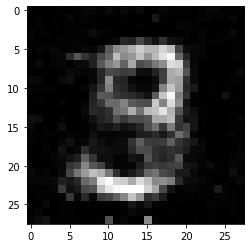

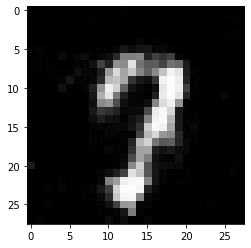

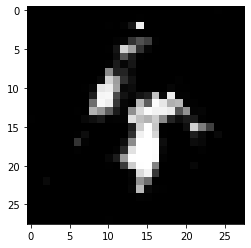

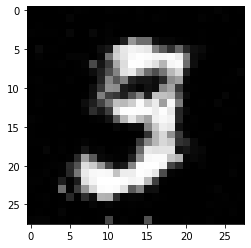

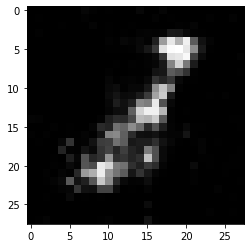

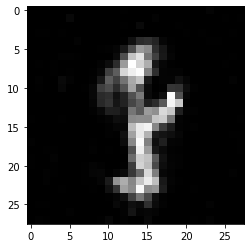

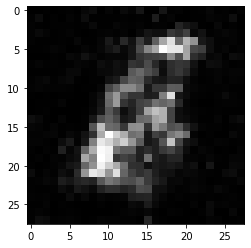

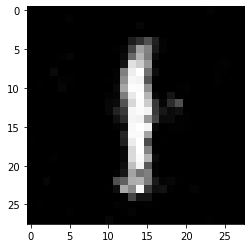

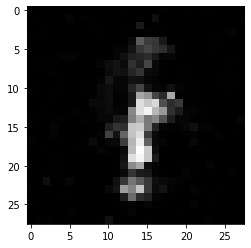

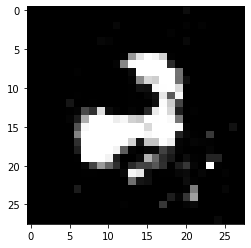

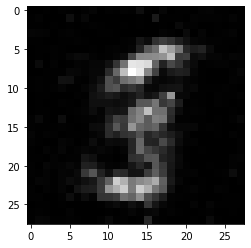

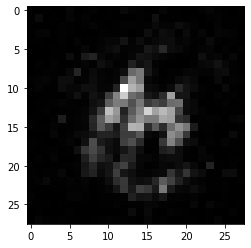

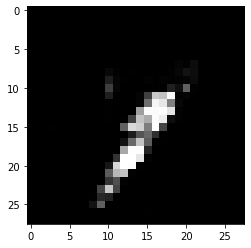

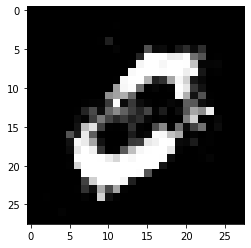

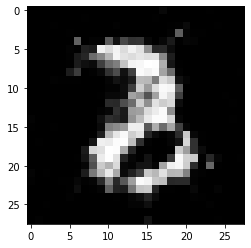

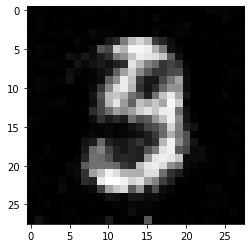

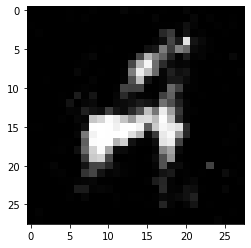

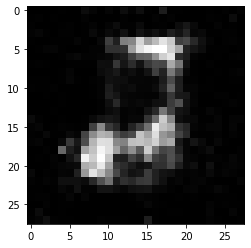

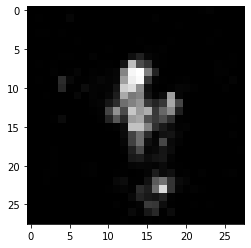

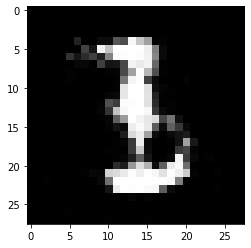

In [20]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap='gray')
  plt.show()